In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import replay_rank_order
import functions,loading
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import replay_fig
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [120]:
df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
cell_metrics = loading.load_all_cell_metrics(df.basepath)

In [121]:
keep_idx = (cell_metrics.putativeCellType.str.contains('Pyramidal') &
            cell_metrics.brainRegion.str.contains('CA1'))
cell_metrics = cell_metrics[keep_idx]

<AxesSubplot:xlabel='deepSuperficialDistance', ylabel='burstIndex_Mizuseki2012'>

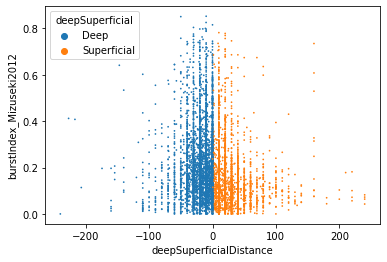

In [122]:
sns.scatterplot(data=cell_metrics, x="deepSuperficialDistance", y="burstIndex_Mizuseki2012",
                hue="deepSuperficial",
                linewidth=0,s=3)

In [123]:
cell_metrics[(cell_metrics.brainRegion == 'CA1') & (cell_metrics.bad_unit == False)].basepath.value_counts()[0:20]

Z:\Data\AYAold\AB3\AB3_38_41               82
Z:\Data\AYAold\AB3\AB3_50_51               79
Z:\Data\AYAold\AB3\AB3_58_59               78
Z:\Data\ORproject\OR23\day5                77
Z:\Data\GirardeauG\Rat11\Rat11-20150331    74
Z:\Data\Kenji\ec016.577_590                72
Z:\Data\AYAold\AB3\AB3_47_49               71
Z:\Data\ORproject\OR15\day3                69
Z:\Data\ORproject\OR15\day4                67
Z:\Data\Kenji\ec014.271_287                67
Z:\Data\ORproject\OR15\day2                66
Z:\Data\Kenji\ec014.207_234                66
Z:\Data\Kenji\ec014.192_204                63
Z:\Data\GirardeauG\Rat11\Rat11-20150327    62
Z:\Data\Kenji\ec014.459_480                60
Z:\Data\AYAold\AB3\AB3_55_57               59
Z:\Data\AYAold\AYA9\day12                  58
Z:\Data\AYAold\AB1\day1                    57
Z:\Data\AYAold\AYA9\day20                  56
Z:\Data\Kenji\ec016.491_508                56
Name: basepath, dtype: int64

<AxesSubplot:xlabel='deepSuperficialDistance', ylabel='brainRegion'>

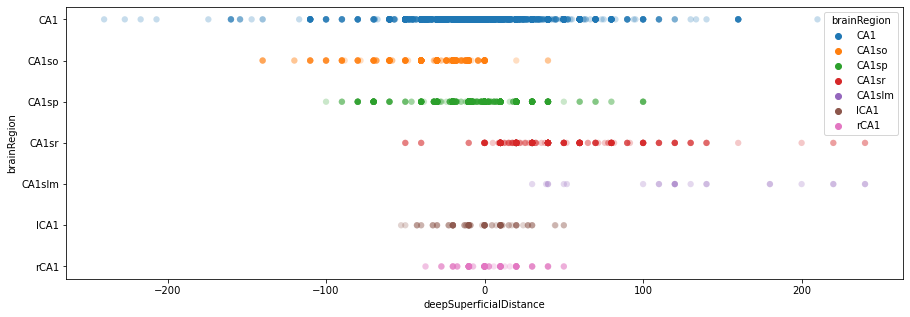

In [71]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=cell_metrics, x="deepSuperficialDistance", y="brainRegion",
                hue="brainRegion",
                linewidth=0,s=40,alpha=.25)

In [72]:
cell_metrics[cell_metrics.deepSuperficialDistance < 100][['UID','basepath']].basepath.value_counts()


Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    237
Z:\Data\ORproject\OR15\day10                     139
Z:\Data\ORproject\OR22\day5                      103
Z:\Data\Kenji\i01_maze05_MS.001_003               99
Z:\Data\Kenji\i01_maze15_MS.001_004               96
                                                ... 
Z:\Data\Kenji\f01_maze11_MS.001_005                3
Z:\Data\ORproject\OR18\day2                        3
Z:\Data\GirardeauG\Rat10\Rat10-20140707            2
Z:\Data\OMLproject\OML19\day3                      2
Z:\Data\Kenji\km01.108_124                         2
Name: basepath, Length: 202, dtype: int64

In [73]:
cell_metrics[np.isnan(cell_metrics.deepSuperficialDistance)][['UID','basepath']]
cell_metrics[np.isnan(cell_metrics.deepSuperficialDistance)].basepath.value_counts()[0:30]


Z:\Data\Kenji\ec015.037_058                  21
Z:\Data\Kenji\ec016.577_590                  21
Z:\Data\Kenji\f01_maze08_MS.001_003          20
Z:\Data\Kenji\ec014.329_340                  20
Z:\Data\Kenji\2006-6-12                      20
Z:\Data\Kenji\g01_maze11_MS.001_004          20
Z:\Data\Kenji\2006-4-18                      19
Z:\Data\GirardeauG\Rat10\Rat10-20140622      19
Z:\Data\Kenji\ec016.100_121                  19
Z:\Data\Kenji\ec013.194_213                  18
Z:\Data\Kenji\ec014.345_366                  18
Z:\Data\Kenji\ec016.444_459                  18
Z:\Data\Kenji\ec013.451_470                  18
Z:\Data\Kenji\f01_maze11_MS.001_005          18
Z:\Data\Kenji\ec016.532_540                  17
Z:\Data\ORproject\OR18\day2                  17
Z:\Data\Kenji\ec016.491_508                  17
Z:\Data\Kenji\2006-4-10                      16
Z:\Data\GirardeauG\Rat10\Rat10-20140620      16
Z:\Data\Kenji\ec013.242_258                  16
Z:\Data\GirardeauG\Rat10\Rat10-20140624 

In [124]:
cell_metrics

,UID,ab_ratio,acg_asymptote,acg_c,acg_d,acg_fit_rsquare,acg_h,acg_refrac,acg_tau_burst,acg_tau_decay,...,SWR_modulationIndex,SWR_modulationPeakResponseTime,SWR_modulationSignificanceLevel,pulses_modulationIndex,pulses_modulationPeakResponseTime,pulses_modulationSignificanceLevel,deltaWaves_modulationIndex,deltaWaves_modulationPeakResponseTime,deltaWaves_modulationSignificanceLevel,phy_amp
0,1,0.189795,-1.536886,16.600993,5.926792,-0.012632,1.519140,2.665222,0.473357,13.446926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,-0.473978,-27.743195,31.309431,9.307983,0.113868,7.106078,5.651872,1.241758,364.096610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,-0.100527,0.849389,19.308071,1.605983,0.836518,22.924170,4.534676,0.733001,21.261936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,-0.446330,1.389989,22.051234,1.230005,0.771209,5.131102,3.902732,1.682890,13.028736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12,-0.197984,16.009499,44.502309,1.123142,0.984060,79.033214,5.001408,0.670589,14.407980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24272,277,-0.499617,2.053506,32.806178,1.244803,0.950055,46.246915,5.027733,0.786050,11.947693,...,NaN,NaN,NaN,NaN,NaN,NaN,0.888351,-0.210,2.462281e-01,54.735168
24273,278,-0.168353,3.443739,9.701756,1.826260,0.948632,20.384791,7.493126,1.519469,12.123529,...,NaN,NaN,NaN,NaN,NaN,NaN,0.855030,-0.030,4.217499e-05,36.810001
24274,279,-0.535352,1.562736,19.258266,1.714672,0.919042,41.365953,6.289643,1.359248,15.752700,...,NaN,NaN,NaN,NaN,NaN,NaN,1.013812,0.432,8.433457e-01,44.487030
24275,280,-0.333959,6.727615,47.467922,0.850041,0.976751,67.144783,4.673066,0.671442,9.029353,...,NaN,NaN,NaN,NaN,NaN,NaN,0.905694,0.366,4.408348e-03,39.686241


In [ ]:
(
    channel_df,
    ripple_average,
    ripple_time_axis,
) = loading.load_deepSuperficialfromRipple(
    basepath, bypass_mismatch_exception=True
)

In [127]:
def find_units_on_shanks_w_polarity_reversal(df):
    for basepath in df.basepath.unique():
        cell_metrics = df[df.basepath == basepath]
        (
            channel_df,
            ripple_average,
            ripple_time_axis,
        ) = loading.load_deepSuperficialfromRipple(
            basepath, bypass_mismatch_exception=True
        )
        channel_df.shank = channel_df.shank + 1
        for shank in channel_df.shank.unique():
            if channel_df[channel_df.shank == shank].channelClass.unique().shape[0] == 2:
                channel_df.loc[channel_df.shank == shank, "polarity_reversal"] = True
            else:
                channel_df.loc[channel_df.shank == shank, "polarity_reversal"] = False

        bool_array = np.in1d(
            cell_metrics.shankID.values,
            channel_df[channel_df.polarity_reversal].shank.unique(),
        )
        cell_metrics.loc[bool_array, "polarity_reversal"] = True
        cell_metrics.loc[~bool_array, "polarity_reversal"] = False

        df.loc[
            df.basepath == basepath, "polarity_reversal"
        ] = cell_metrics.polarity_reversal
    return df


cell_metrics = find_units_on_shanks_w_polarity_reversal(cell_metrics)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Cornell\AppData\Local\Temp/ipykernel_12348/3989495127.py", line 31, in <module>
    cell_metrics = find_units_on_shanks_w_polarity_reversal(cell_metrics)
  File "C:\Users\Cornell\AppData\Local\Temp/ipykernel_12348/3989495127.py", line 8, in find_units_on_shanks_w_polarity_reversal
    ) = loading.load_deepSuperficialfromRipple(
  File "D:\github\ripple_heterogeneity\python\loading.py", line 883, in load_deepSuperficialfromRipple
    try:
ValueError: no field of name channel

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
At

TypeError: object of type 'NoneType' has no len()

In [ ]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")
avg_rip = []
channel_df_all = pd.DataFrame()
for basepath in df.basepath:
    (
        channel_df,
        ripple_average,
        ripple_time_axis,
    ) = loading.load_deepSuperficialfromRipple(
        basepath, bypass_mismatch_exception=True
    )
    avg_rip.append(np.hstack(ripple_average).T)
    channel_df["basepath"] = basepath
    channel_df_all = pd.concat([channel_df_all, channel_df], ignore_index=True)


In [176]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")

for basepath in df.basepath:
    try:
        brainRegions = loading.load_brain_regions(basepath)
    except:
        print(basepath)

In [179]:
brainRegions['PFC']

{'channels': array([  1,  14,  19,  32,  15,  18,   2,  16,  17,  13,  20,   4,  12,
         21,   5,  11,  22,   6,  10,  23,  31,   9,  24,  30,   8,  25,
         29,   7,  26,  28,  27,   3,  33,  46,  51,  64,  47,  50,  34,
         48,  49,  35,  45,  52,  36,  44,  53,  37,  43,  54,  38,  42,
         55,  63,  41,  56,  62,  40,  57,  61,  39,  58,  60,  59,  65,
         78,  83,  96,  79,  82,  66,  80,  81,  67,  77,  84,  68,  76,
         85,  69,  75,  86,  70,  74,  87,  95,  73,  88,  94,  72,  89,
         93,  71,  90,  92,  91,  97, 110, 115, 128, 111, 114,  98, 112,
        113,  99, 109, 116, 100, 108, 117, 101, 107, 118, 102, 106, 119,
        127, 105, 120, 126, 104, 121, 125, 103, 122, 124, 123], dtype=uint8),
 'electrodeGroups': array([1, 2, 3, 4], dtype=uint8)}

In [180]:
brainRegions['CA1']['channels']

array([270, 275, 288, 271, 274, 258, 272, 273, 269, 276, 260, 268, 277,
       261, 267, 278, 262, 266, 279, 287, 265, 280, 286, 264, 281, 285,
       263, 282, 284, 283, 259, 302, 307, 320, 303, 306, 290, 304, 305,
       291, 301, 308, 292, 300, 309, 293, 299, 310, 294, 298, 311, 319,
       297, 312, 318, 296, 313, 317, 295, 314, 316, 315, 334, 339, 352,
       335, 338, 322, 336, 337, 323, 333, 340, 324, 332, 341, 325, 331,
       342, 326, 330, 343, 351, 329, 344, 350, 328, 345, 349, 327, 346,
       348, 347, 366, 371, 384, 367, 370, 354, 368, 369, 355, 365, 372,
       356, 364, 373, 357, 363, 374, 358, 362, 375, 383, 361, 376, 382,
       360, 377, 381, 359, 378, 380, 379], dtype=uint16)

In [25]:
avg_rip = np.vstack(avg_rip)

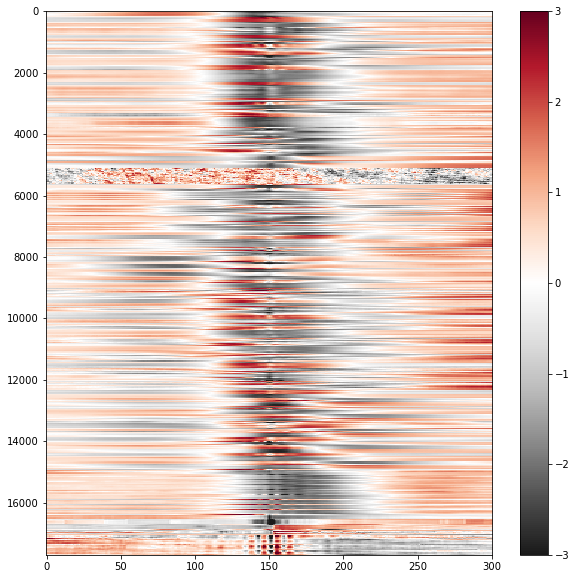

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(stats.zscore(avg_rip,axis=1),aspect='auto',interpolation='nearest',vmax=3,vmin=-3,cmap='RdGy_r')
plt.colorbar()


In [77]:
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [72]:
pca = PCA()
# X = stats.zscore(avg_rip,axis=1)
X = avg_rip
pca.fit(X)
X = pca.transform(X)
X.shape

(17695, 301)

In [79]:
kmeans = KMeans(init=pca.components_, n_clusters=4)
kmeans

KMeans(init=array([[-0.05347468, -0.05351611, -0.05353121, ..., -0.05590953,
        -0.05582887, -0.05585202],
       [-0.02632651, -0.02618696, -0.02619916, ..., -0.06007369,
        -0.06054094, -0.06036083],
       [-0.05414011, -0.05457794, -0.05437565, ...,  0.03909098,
         0.03929802,  0.03871979],
       ...,
       [-0.0424308 ,  0.11006969, -0.13702485, ..., -0.01724747,
         0.01895382, -0.00736716],
       [ 0.01952589, -0.0505287 ,  0.0663798 , ..., -0.03795505,
         0.02379212, -0.00894395],
       [-0.01609669,  0.0348469 , -0.03862241, ...,  0.03970124,
        -0.0251593 ,  0.00775109]]),
       n_clusters=4)

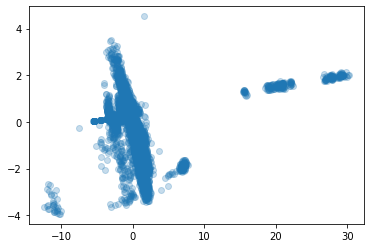

In [75]:
plt.scatter(X[:,0],X[:,1],alpha=.25)

In [80]:
pca = PCA()
# X = stats.zscore(avg_rip,axis=1)
X = avg_rip.T
pca.fit(X)
X = pca.transform(X)

In [61]:
X.shape

(301, 301)

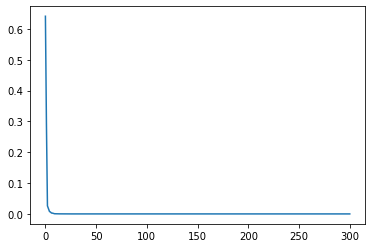

In [83]:
plt.plot(pca.explained_variance_/pca.explained_variance_.sum())

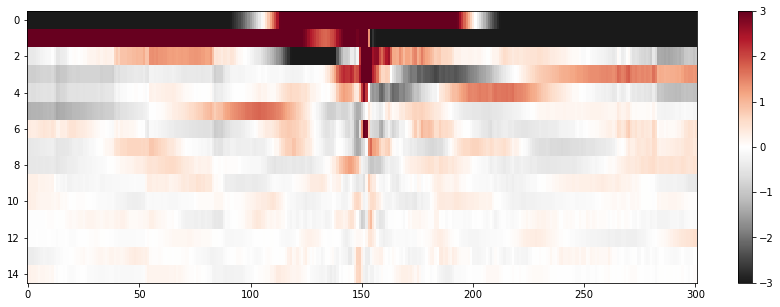

In [71]:
plt.figure(figsize=(15,5))
plt.imshow(X.T[0:15],aspect='auto',interpolation='nearest',vmax=3,vmin=-3,cmap='RdGy_r')
plt.colorbar()

In [18]:
basepath

'Z:\\Data\\GirardeauG\\Rat09\\Rat09-20140328'

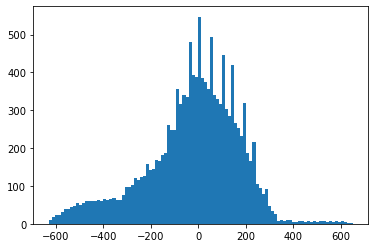

In [9]:
plt.hist(channel_df_all.channelDistance,100)
plt.show()

In [35]:
channel_df_all

'Z:\\Data\\GirardeauG\\Rat08\\Rat08-20130708'

In [ ]:
channel_df, ripple_average, ripple_time_axis = loading.load_deepSuperficialfromRipple(basepath)

In [30]:
import scipy.io as sio
import glob


basepath = r"Z:\Data\Kenji\ec014.459_480"
channel_df, ripple_average, ripple_time_axis = loading.load_deepSuperficialfromRipple(basepath)
channel_df


,channel,channelDistance,channelClass,shank,ripple_power,ripple_amplitude,SWR_diff,SWR_amplitude
0,1,0.0,Deep,0.0,0.339652,0.452168,0.477821,0.000000
1,2,-10.0,Deep,0.0,0.306845,0.039188,0.561992,0.130341
2,3,-20.0,Deep,0.0,0.596234,0.691777,0.591699,0.185541
3,4,-30.0,Deep,0.0,0.969106,-1.000000,0.679529,0.325778
4,5,-40.0,Deep,0.0,0.512357,-0.032866,0.733745,0.430672
...,...,...,...,...,...,...,...,...
91,92,50.0,Superficial,11.0,0.461468,0.048909,-0.958635,0.550648
92,93,40.0,Superficial,11.0,0.466822,0.058950,-0.907529,0.085764
93,94,30.0,Superficial,11.0,0.704850,0.659553,-0.973896,0.546790
94,95,20.0,Superficial,11.0,0.543878,0.323865,-0.948092,0.282345


In [17]:
np.hstack(ripple_average).T.shape

(96, 301)

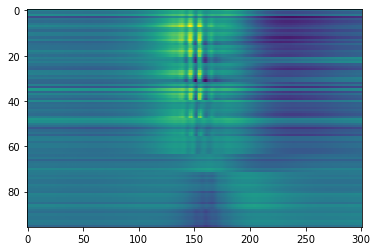

In [12]:
plt.imshow(np.hstack(ripple_average).T,aspect='auto',interpolation='nearest')

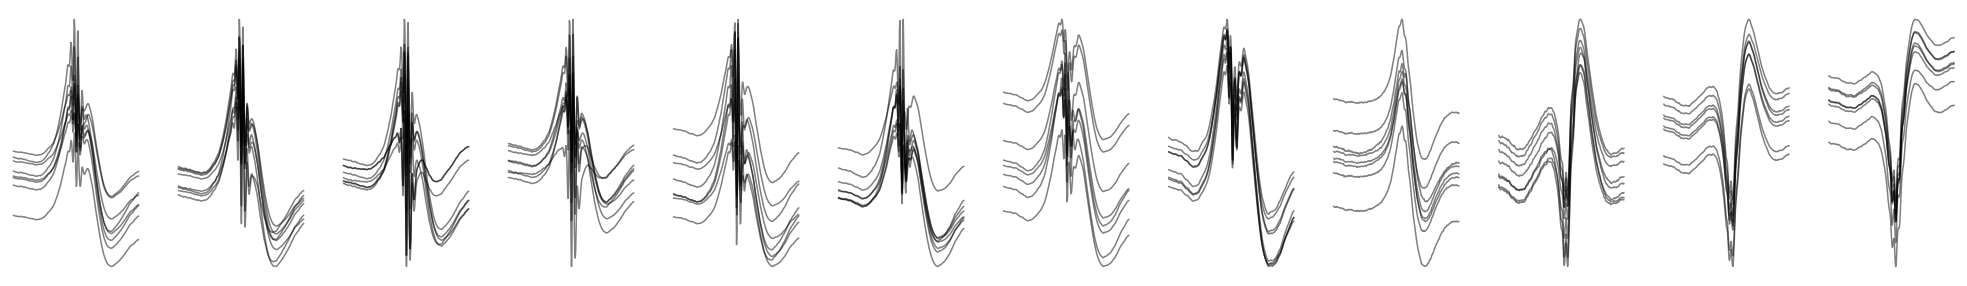

In [4]:
fig,ax = plt.subplots(1,12,figsize=(35,5))
for i,rip in enumerate(ripple_average):
    offset = channel_df[channel_df.shank == i].channelDistance.T
    ax[i].plot(ripple_time_axis,rip,alpha=.5,color='k')
    ax[i].axis('off')
    ax[i].axis('tight')
plt.show()


In [91]:
np.vstack(data['deepSuperficialfromRipple']['ripple_channels'][0][0][0]).flatten()

for shank_i,shank in enumerate(data['deepSuperficialfromRipple']['ripple_channels'][0][0][0]):
    # a,b,c = np.intersect1d(channel_df.channel,shank,return_indices=True)
    # channel_df.loc[b,'shank'] = shank_i
    a,b,c = np.intersect1d(shank,channel_df.channel,return_indices=True)
    print(shank)
    print(b)

# channel_df

[[8 7 6 5 4 3 2 1]]
[7 6 5 4 3 2 1 0]
[[16 15 14 13 12 11 10  9]]
[7 6 5 4 3 2 1 0]
[[24 23 22 21 20 19 18 17]]
[7 6 5 4 3 2 1 0]
[[32 31 30 29 28 27 26 25]]
[7 6 5 4 3 2 1 0]
[[40 39 38 37 36 35 34 33]]
[7 6 5 4 3 2 1 0]
[[48 47 46 45 44 43 42 41]]
[7 6 5 4 3 2 1 0]
[[56 55 54 53 52 51 50 49]]
[7 6 5 4 3 2 1 0]
[[64 63 62 61 60 59 58 57]]
[7 6 5 4 3 2 1 0]
[[72 71 70 69 68 67 66 65]]
[7 6 5 4 3 2 1 0]
[[80 79 78 77 76 75 74 73]]
[7 6 5 4 3 2 1 0]
[[88 87 86 85 84 83 82 81]]
[7 6 5 4 3 2 1 0]
[[96 95 94 93 92 91 90 89]]
[7 6 5 4 3 2 1 0]


In [25]:
collect = []
for item in channelClass:
    try:
        collect.append(item[0][0])
    except:
        collect.append('unknown')
len(collect)

99

In [16]:
# channelClass[0][0][0]
channelClass = [item[0][0] for item in channelClass]
channelClass

IndexError: index 0 is out of bounds for axis 0 with size 0